# <p style='text-align: center;'> Word Embeddings in NLP </p>

## What are Word Embeddings?
**Word Embeddings** are the texts converted into numbers and there may be different numerical representations of the same text.

## Why do we need Word Embeddings?
Let us consider the two sentences – “**You can scale your business**.” and “**You can grow your business**.”. These two sentences have the same meaning. If we consider a vocabulary considering these two sentences, it will constitute of these words: **{You, can, scale, grow, your, business}**.

A one-hot encoding of these words would create a vector of length 6. The encodings for each of the words would look like this:

**You**: [1,0,0,0,0,0], **Can**: [0,1,0,0,0,0], **Scale**: [0,0,1,0,0,0], **Grow**: [0,0,0,1,0,0],

**Your**: [0,0,0,0,1,0], **Business**: [0,0,0,0,0,1]

In a **6-dimensional** space, each word would occupy one of the dimensions, meaning that none of these words has any similarity with each other – irrespective of their literal meanings.

**Word2Vec**, a **word embedding methodology**, solves this issue and enables similar words to have similar dimensions and, consequently, helps bring context.



## Different types of Word Embeddings
The different types of word embeddings can be broadly classified into two categories-

1. Frequency based Embedding


2. Prediction based Embedding

Let us try to understand each of these methods in detail.

## 1. Frequency based Embedding
There are generally three types of vectors that we encounter under this category.

1. Count Vector


2. TF-IDF Vector


3. Co-Occurrence Vector


Let us look into each of these vectorization methods in detail.

### 1.1 Count Vector
**CountVectorizer** is one of the simplest techniques that is used for converting text into vectors. It starts by tokenizing the document into a list of tokens (words). It selects the unique tokens from the token list and creates a vocabulary of words. Finally, a sparse matrix is created containing the frequency of words, where each row represents different sentences and each column represents unique words.

Python’s scikit-learn has a class named **CountVectorizer()** that provides a simple implementation for performing vectorization on text data.

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens will form our dictionary and the size of the Count Vector matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.

D1: He is a lazy boy. She is also lazy.

D2: Neeraj is a lazy person.

The dictionary created may be a list of unique tokens(words) in the corpus =[‘He’,’She’,’lazy’,’boy’,’Neeraj’,’person’]

Here, D=2, N=6

The count matrix M of size 2 X 6 will be represented as –

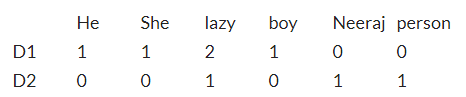

Now, a column can also be understood as word vector for the corresponding word in the matrix M. For example, the word vector for ‘lazy’ in the above matrix is [2,1] and so on.Here, the rows correspond to the documents in the corpus and the columns correspond to the tokens in the dictionary. The second row in the above matrix may be read as – D2 contains ‘lazy’: once, ‘Neeraj’: once and ‘person’ once.

Now there may be quite a few variations while preparing the above matrix M. The variations will be generally in-

1. **The way dictionary is prepared**: Why? Because in real world applications we might have a corpus which contains millions of documents. And with millions of document, we can extract hundreds of millions of unique words. So basically, the matrix that will be prepared like above will be a very sparse one and inefficient for any computation. So an alternative to using every unique word as a dictionary element would be to pick say top 10,000 words based on frequency and then prepare a dictionary.


2. **The way count is taken for each word**: We may either take the frequency (number of times a word has appeared in the document) or the presence(has the word appeared in the document?) to be the entry in the count matrix M. But generally, frequency method is preferred over the latter.


Below is a representational image of the matrix M for easy understanding.

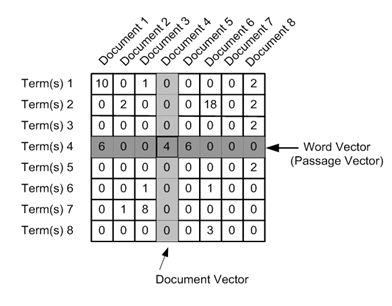

### 1.2 TF-IDF vectorization
This is another method which is based on the frequency method but it is different to the count vectorization in the sense that it takes into account not just the occurrence of a word in a single document but in the entire corpus. So, what is the rationale behind this? Let us try to understand.

**Term Frequency - Inverse Document Frequency (TF-IDF)** is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus). Words within a text document are transformed into importance numbers by a text vectorization process. There are many different text vectorization scoring schemes, with TF-IDF being one of the most common.


As its name implies, TF-IDF vectorizes/scores a word by multiplying the word’s Term Frequency (TF) with the Inverse Document Frequency (IDF).


**Term Frequency:** TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.


              number of times the term appears in the document
    TF = ----------------------------------------------------------
                    total number of terms in the document
                    
                    
                    
**Inverse Document Frequency:** IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).


                      total number of documents in the corpus
    IDF = log (------------------------------------------------------)
                 number of documents in the corpus contain the term  
    
  
The **TF-IDF** of a term is calculated by multiplying TF and IDF scores.


    TF-IDF = TF * IDF


**TF-IDF** scores range from 0 to 1. A score closer to 1 is higher the importance of a word to a document.


**TF-IDF** is useful in many natural language processing applications. For example, Search Engines use TF-IDF to rank the relevance of a document for a query. TF-IDF is also employed in text classification, text summarization, and topic modeling.


**Note** that there are some different approaches to calculating the IDF score. The base 10 logarithm is often used in the calculation. However, some libraries use a natural logarithm. In addition, one can be added to the denominator as follows in order to avoid division by zero.


                        total number of documents in the corpus
    IDF = log (----------------------------------------------------------)
                 number of documents in the corpus contain the term + 1


<b> Numerical Example:
    
Imagine the term 't' appears 20 times in a document that contains a total of 100 words. Term Frequency (TF) of 't' can be calculated as follow:  
    
    
            20
    TF = --------- = 0.2
            100         


Assume a collection of related documents contains 10,000 documents. If 100 documents out of 10,000 documents contain the term 't', Inverse Document Frequency (IDF) of 't' can be calculated as follows:
    
    
                 10000
    IDF = log (---------) = 2
                  100
    
    
Using these two quantities, we can calculate TF-IDF score of the term 't' for the document.   
    
    
    TF-IDF = 0.2 * 2 = 0.4
    
    
Python’s scikit-learn has a class named **TfidfVectorizer()** that provides a TF-IDF code for performing vectorization on text data. 

    from sklearn.feature_extraction.text import TfidfVectorizer

### 1.3 Co-Occurrence Matrix with a fixed context window
**The big idea** – Similar words tend to occur together and will have similar context for example – Apple is a fruit. Mango is a fruit.

Apple and mango tend to have a similar context i.e fruit.

Before I dive into the details of how a co-occurrence matrix is constructed, there are two concepts that need to be clarified – Co-Occurrence and Context Window.

**Co-occurrence** – For a given corpus, the co-occurrence of a pair of words say w1 and w2 is the number of times they have appeared together in a Context Window.

**Context Window** – Context window is specified by a number and the direction. So what does a context window of 2 (around) means? Let us see an example below,

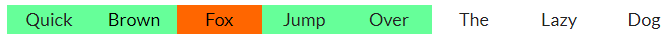

The green words are a 2 (around) context window for the word ‘Fox’ and for calculating the co-occurrence only these words will be counted. Let us see context window for the word ‘Over’.

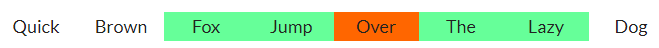

Now, let us take an example corpus to calculate a co-occurrence matrix.

Corpus = He is not lazy. He is intelligent. He is smart.

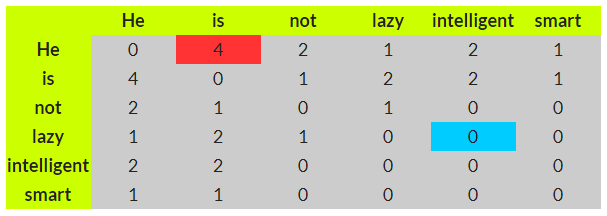

Let us understand this co-occurrence matrix by seeing two examples in the table above. Red and the blue box.

Red box- It is the number of times ‘He’ and ‘is’ have appeared in the context window 2 and it can be seen that the count turns out to be 4. The below table will help you visualise the count.

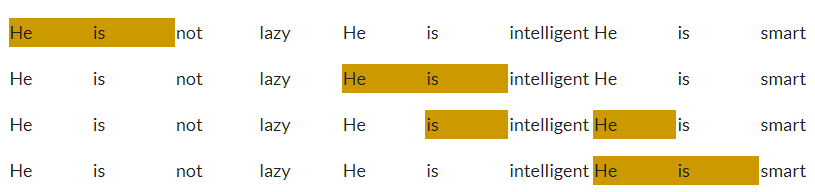

while the word ‘lazy’ has never appeared with ‘intelligent’ in the context window and therefore has been assigned 0 in the blue box.

<b> Variations of Co-occurrence Matrix

Let’s say there are V unique words in the corpus. So Vocabulary size = V. The columns of the Co-occurrence matrix form the context words. The different variations of Co-Occurrence Matrix are-

1. A co-occurrence matrix of size V X V. Now, for even a decent corpus V gets very large and difficult to handle. So generally, this architecture is never preferred in practice.
    
    
2. A co-occurrence matrix of size V X N where N is a subset of V and can be obtained by removing irrelevant words like stopwords etc. for example. This is still very large and presents computational difficulties.

## 2. Prediction based Embedding
So far, we have seen deterministic methods to determine word vectors. But these methods proved to be limited in their word representations until Mitolov etc. el introduced word2vec to the NLP community. These methods were prediction based in the sense that they provided probabilities to the words and proved to be state of the art for tasks like word analogies and word similarities. They were also able to achieve tasks like King -man +woman = Queen, which was considered a result almost magical. So let us look at the word2vec model used as of today to generate word vectors.

**Word2vec** is not a single algorithm but a combination of two techniques – **CBOW(Continuous bag of words)** and **Skip-gram** model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

### What is Word2Vec?
Word2Vec creates vectors of the words that are distributed numerical representations of word features – these word features could comprise of words that represent the context of the individual words present in our vocabulary. Word embeddings eventually help in establishing the association of a word with another similar meaning word through the created vectors.

As seen in the image below where word embeddings are plotted, similar meaning words are closer in space, indicating their semantic similarity.

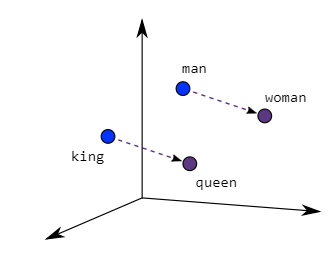

Two different model architectures that can be used by **Word2Vec** to create the word embeddings are the **Continuous Bag of Words (CBOW) model & the Skip-Gram model**.

### a) CBOW (Continuous Bag of words)
The way **CBOW** work is that it tends to predict the probability of a word given a context. A context may be a single word or a group of words. But for simplicity, I will take a single context word and try to predict a single target word.

Suppose, we have a corpus C = “Hey, this is sample corpus using only one context word.” and we have defined a context window of 1. This corpus may be converted into a training set for a CBOW model as follow. The input is shown below. The matrix on the right in the below image contains the one-hot encoded from of the input on the left.

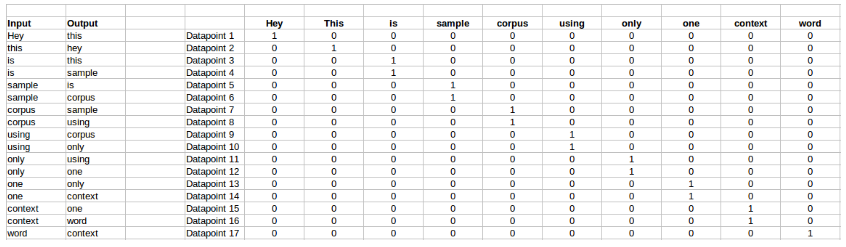

The target for a single datapoint say Datapoint 4 is shown as below

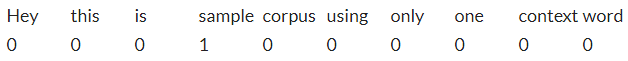

This matrix shown in the above image is sent into a shallow neural network with three layers: an input layer, a hidden layer and an output layer. The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. Now let us see how the forward propagation will work to calculate the hidden layer activation.

Let us first see a diagrammatic representation of the CBOW model.

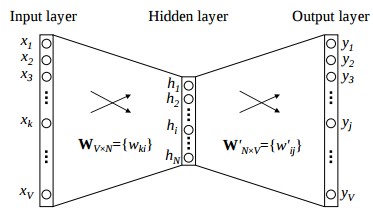

The matrix representation of the above image for a single data point is below.

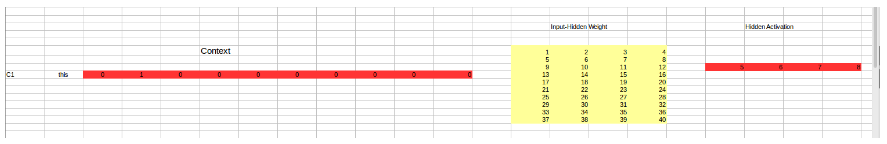

The flow is as follows:

1. The input layer and the target, both are one- hot encoded of size [1 X V]. Here V=10 in the above example.


2. There are two sets of weights. one is between the input and the hidden layer and second between hidden and output layer. Input-Hidden layer matrix size =[V X N] , hidden-Output layer matrix  size =[N X V] : Where N is the number of dimensions we choose to represent our word in. It is arbitary and a hyper-parameter for a Neural Network. Also, N is the number of neurons in the hidden layer. Here, N=4.


3. There is a no activation function between any layers.( More specifically, I am referring to linear activation).


4. The input is multiplied by the input-hidden weights and called hidden activation. It is simply the corresponding row in the input-hidden matrix copied.


5. The hidden input gets multiplied by hidden- output weights and output is calculated.


6. Error between output and target is calculated and propagated back to re-adjust the weights.


7. The weight  between the hidden layer and the output layer is taken as the word vector representation of the word.

We saw the above steps for a single context word. Now, what about if we have multiple context words? The image below describes the architecture for multiple context words.

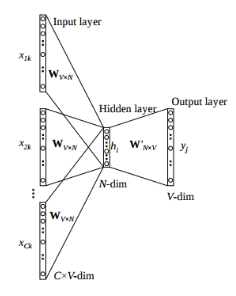

Below is a matrix representation of the above architecture for an easy understanding.

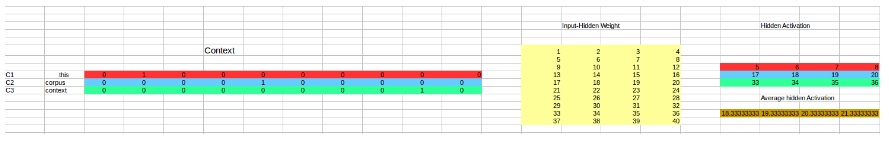


The image above takes 3 context words and predicts the probability of a target word. The input can be assumed as taking three one-hot encoded vectors in the input layer as shown above in red, blue and green.

So, the input layer will have 3 [1 X V] Vectors in the input as shown above and 1 [1 X V] in the output layer. Rest of the architecture is same as for a 1-context CBOW.

The steps remain the same, only the calculation of hidden activation changes. Instead of just copying the corresponding rows of the input-hidden weight matrix to the hidden layer, an average is taken over all the corresponding rows of the matrix. We can understand this with the above figure. The average vector calculated becomes the hidden activation. So, if we have three context words for a single target word, we will have three initial hidden activations which are then averaged element-wise to obtain the final activation.

In both a single context word and multiple context word, I have shown the images till the calculation of the hidden activations since this is the part where CBOW differs from a simple MLP network.

<b> Advantages of CBOW:

1. Being probabilistic is nature, it is supposed to perform superior to deterministic methods(generally).
    
    
2. It is low on memory. It does not need to have huge RAM requirements like that of co-occurrence matrix where it needs to store three huge matrices.
 

<b> Disadvantages of CBOW:

1. CBOW takes the average of the context of a word (as seen above in calculation of hidden activation). For example, Apple can be both a fruit and a company but CBOW takes an average of both the contexts and places it in between a cluster for fruits and companies.
    
    
2. Training a CBOW from scratch can take forever if not properly optimized.

### b) Skip – Gram model
Skip – gram follows the same topology as of CBOW. It just flips CBOW’s architecture on its head. The aim of skip-gram is to predict the context given a word. Let us take the same corpus that we built our CBOW model on. C=”Hey, this is sample corpus using only one context word.” Let us construct the training data.

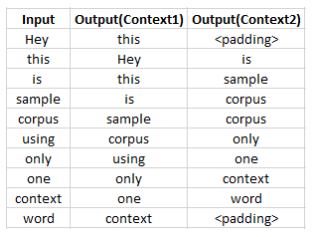

The input vector for skip-gram is going to be similar to a 1-context CBOW model. Also, the calculations up to hidden layer activations are going to be the same. The difference will be in the target variable. Since we have defined a context window of 1 on both the sides, there will be **“two” one hot encoded target variables** and **“two” corresponding outputs** as can be seen by the blue section in the image.

Two separate errors are calculated with respect to the two target variables and the two error vectors obtained are added element-wise to obtain a final error vector which is propagated back to update the weights.

The weights between the input and the hidden layer are taken as the word vector representation after training. The loss function or the objective is of the same type as of the CBOW model.

The skip-gram architecture is shown below.

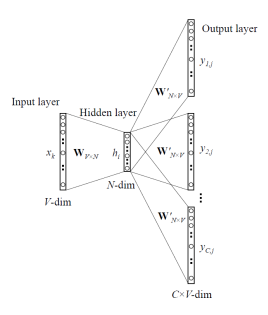

For a better understanding, matrix style structure with calculation has been shown below.

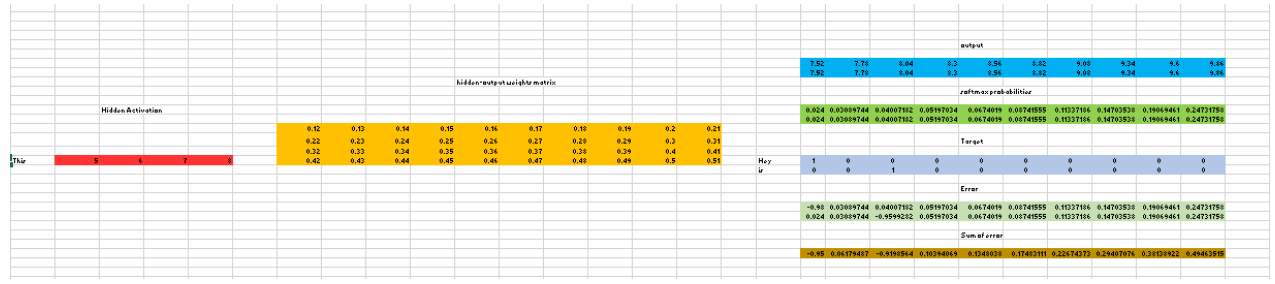

Let us break down the above image.

Input layer  size – [1 X V], Input hidden weight matrix size – [V X N], Number of neurons in hidden layer – N, Hidden-Output weight matrix size – [N X V], Output layer size – C [1 X V]

In the above example, C is the number of context words=2, V= 10, N=4

1. The row in red is the hidden activation corresponding to the input one-hot encoded vector. It is basically the corresponding row of input-hidden matrix copied.


2. The yellow matrix is the weight between the hidden layer and the output layer.


3. The blue matrix is obtained by the matrix multiplication of hidden activation and the hidden output weights. There will be two rows calculated for two target(context) words.


4. Each row of the blue matrix is converted into its softmax probabilities individually as shown in the green box.


5. The grey matrix contains the one hot encoded vectors of the two context words(target).


6. Error is calculated by substracting the first row of the grey matrix(target) from the first row of the green matrix(output) element-wise. This is repeated for the next row. Therefore, for n target context words, we will have n error vectors.


7. Element-wise sum is taken over all the error vectors to obtain a final error vector.


8. This error vector is propagated back to update the weights.


<b> Advantages of Skip-Gram Model
1. Skip-gram model can capture two semantics for a single word. i.e it will have two vector representations of Apple. One for the company and other for the fruit.
    
    
2. Skip-gram with negative sub-sampling outperforms every other method generally.

### How to choose Skip Gram vs CBOW ? –
It is really a million doller question . There could be multiple scenario which effects this decision but we will cover the game changer reason . I mean which has the higher impact . Lets understand –

1. In order to achieve fast training / speed , You should go with SkipGram algoritms if data size is not very big . In General view , CBOW is faster than SkipGram.


2. SkipGram performs well on less frequent data . CBOW is good with high frequent data .

## Word Embeddings use case scenarios
Since word embeddings or word Vectors are numerical representations of contextual similarities between words, they can be manipulated and made to perform amazing tasks like-

<b> 1. Finding the degree of similarity between two words.                                                   

   model.similarity('woman','man')

   0.73723527


<b> 2. Finding odd one out.

   model.doesnt_match('breakfast cereal dinner lunch';.split())
   
   'cereal'


<b> 3. Amazing things like woman+king-man =queen

   model.most_similar(positive=['woman','king'],negative=['man'],topn=1)
   
   queen: 0.508


<b> 4. Probability of a text under the model

   model.score(['The fox jumped over the lazy dog'.split()])
   
   0.21

    
Below is one interesting visualisation of word2vec.
    
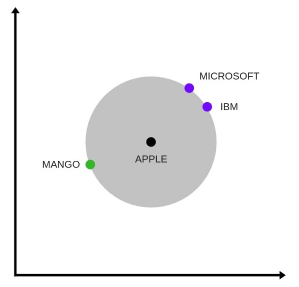
    
The above image is a t-SNE representation of word vectors in 2 dimension and you can see that two contexts of apple have been captured. One is a fruit and the other company.
    
    
<b> 5.  It can be used to perform Machine Translation.
    
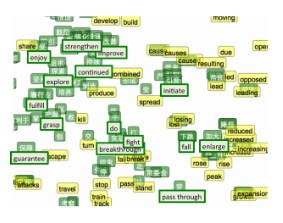
    
The above graph is a bilingual embedding with chinese in green and english in yellow. If we know the words having similar meanings in chinese and english, the above bilingual embedding can be used to translate one language into the other.

### Training our own word vectors
We will be training our own word2vec on a custom corpus. For training the model we will be using gensim and the steps are illustrated as below.

word2Vec requires that a format of list of list for training where every document is contained in a list and every list contains list of tokens of that documents. I won’t be covering the pre-preprocessing part here. So let’s take an example list of list to train our word2vec model.

To work with 'Word2Vec' class we need to download the 'gensim' library.

In [5]:
!pip install gensim

In [22]:
sentence=[['Neeraj','Boy'],['Rani','Girl'],['Sarwan','is'],['good','boy']]

# import the 'Word2Vec' class from 'gensim.models' library
import gensim
from gensim.models import Word2Vec

#training word2vec on 3 sentences
model = gensim.models.Word2Vec(sentence, min_count=1, workers=4)

Let us try to understand the parameters of this model.

- sentence – list of list of our corpus


- min_count=1 -the threshold value for the words. Word with frequency greater than this only are going to be included into the model.


- size=300 – the number of dimensions in which we wish to represent our word. This is the size of the word vector.


- workers=4 – used for parallelization

using the model, the new trained model can be used similar to the pre-trained ones.

In [25]:
# printing similarity index
print(model.wv.similarity('Girl', 'Boy'))

0.034764953
